Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 10, 1, 13, 3, 10, 4, 11, 7, 7, 7…
$ Glucose                  <dbl> 85, 89, 116, 115, 139, 103, 145, 88, 122, 103…
$ BloodPressure            <dbl> 66, 66, 74, 0, 80, 30, 82, 58, 78, 60, 76, 84…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 19, 11, 31, 33, 0, 0, 18…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 110, 54, 0, 192, 0, 0, 0,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 27.1, 43.3, 22.2, 24.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 1.441, 0.183, 0.2…
$ Age                      <dbl> 31, 21, 30, 29, 57, 33, 57, 22, 45, 33, 35, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

✅ Only the `Outcome` variable is suitable. All the other variables are doubles, while the `Outcome` variable is a factor.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration [at] 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

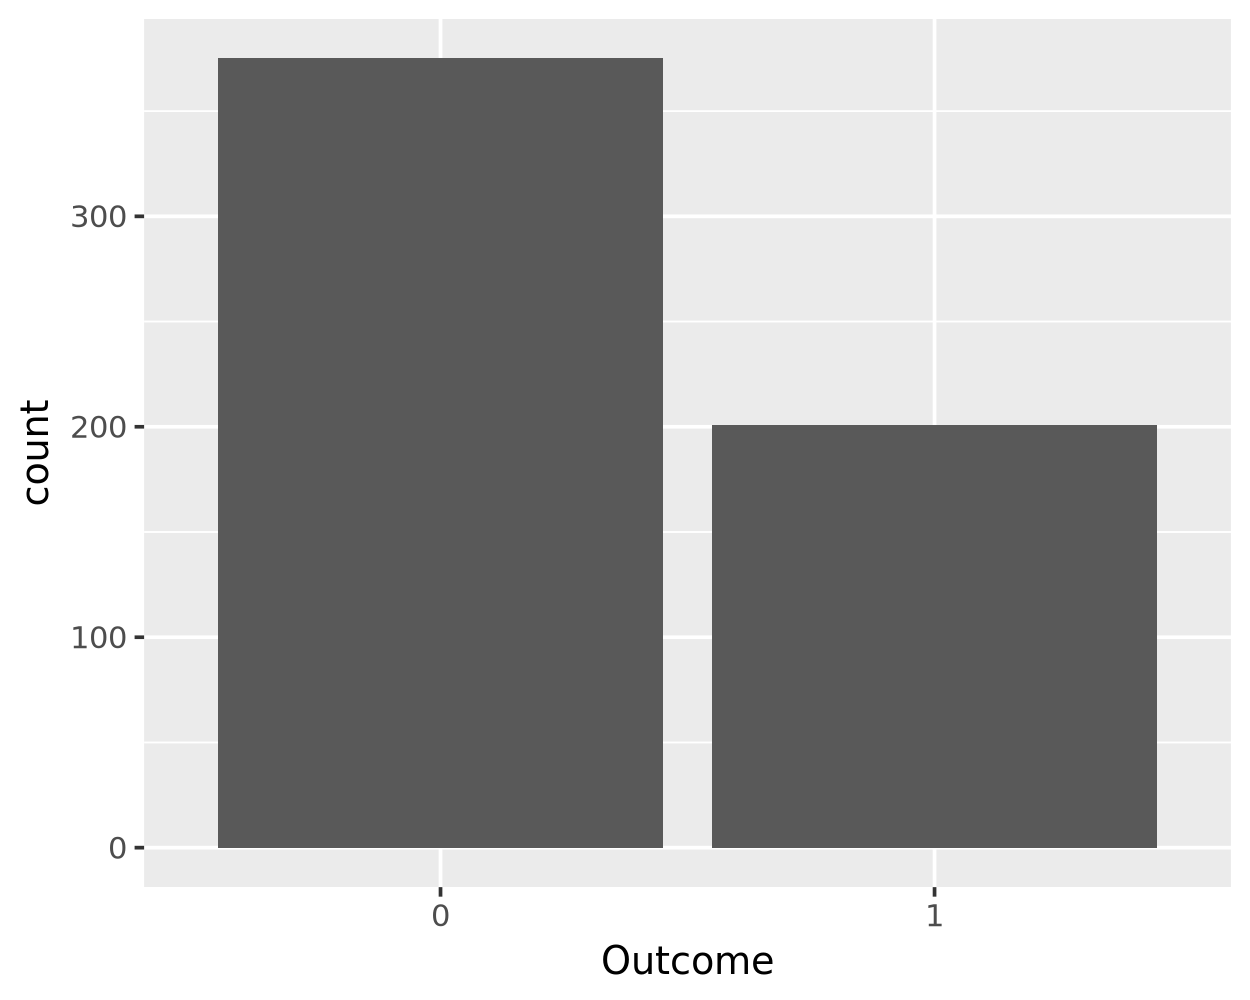

In [6]:
ggplot(data = diabetes_train) +
    geom_bar(aes(x = Outcome))

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

✅ The data is unbalanced. There are significantly more records with an `Outcome` of `0` than of `1`.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [7]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

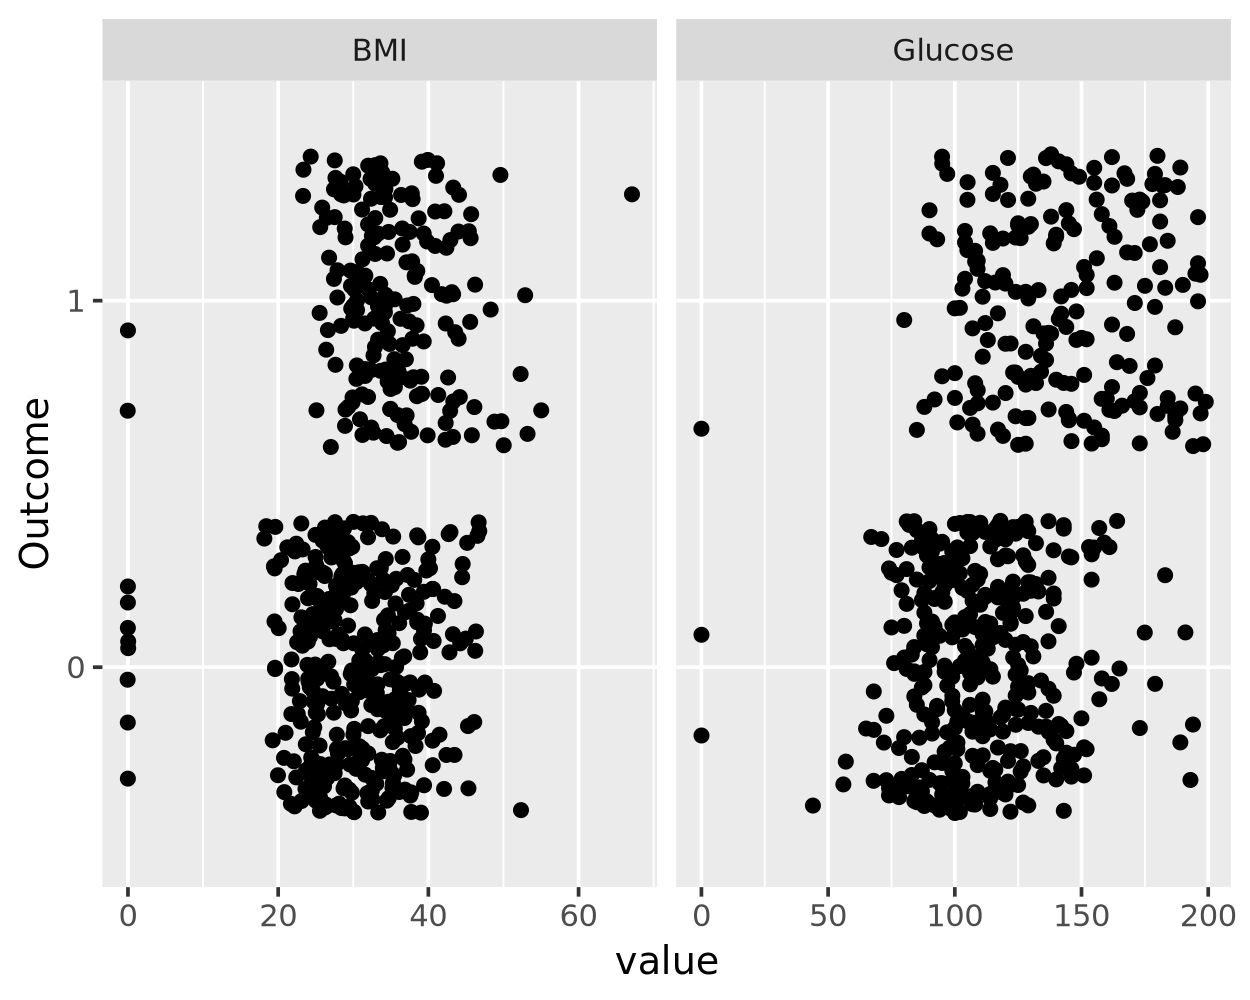

In [18]:
plot_df |> drop_na() |> ggplot() +
    geom_jitter(aes(x = value, y = Outcome)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

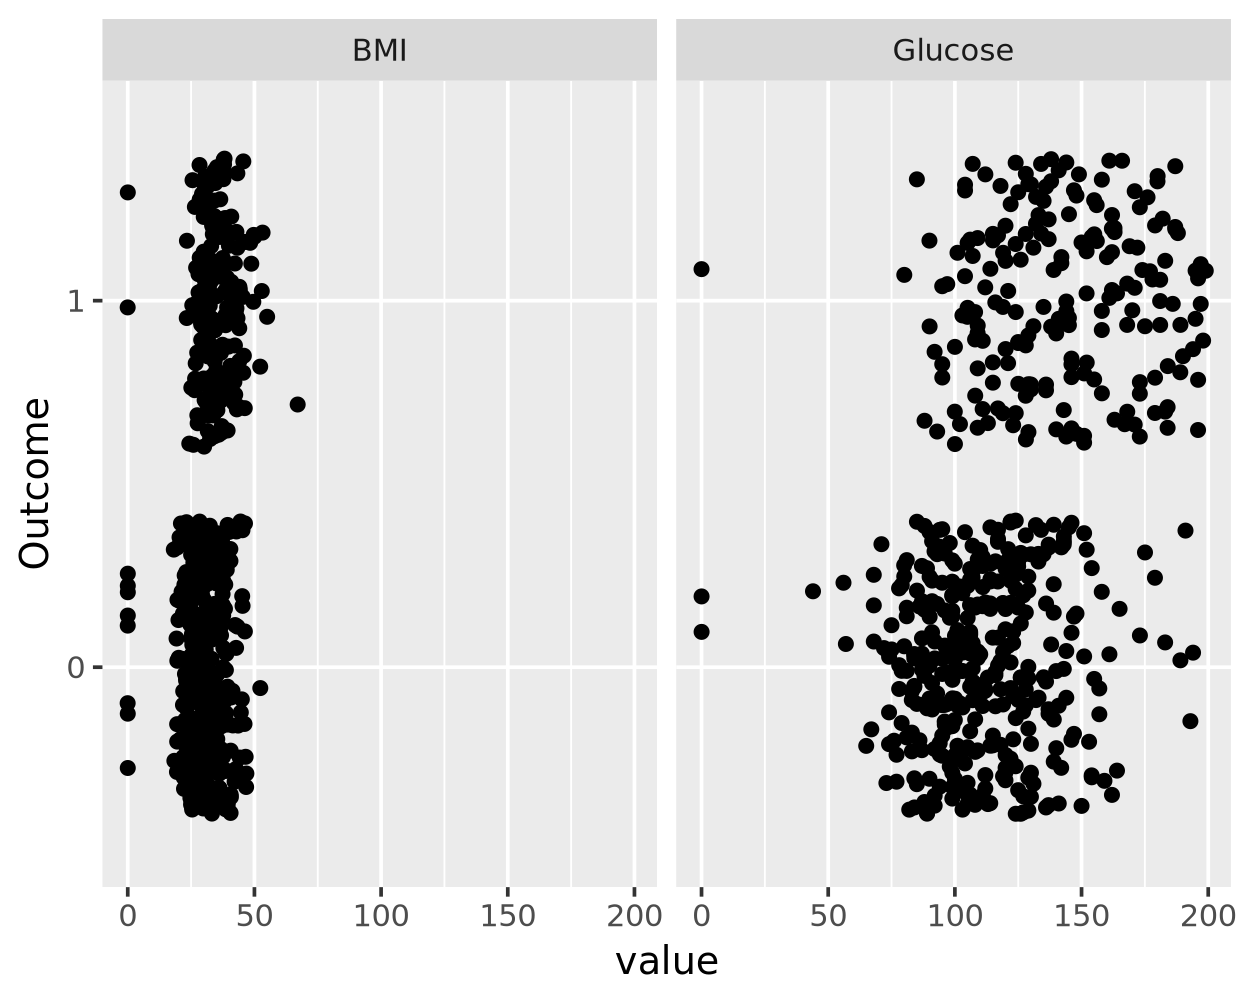

In [19]:
plot_df |> drop_na() |> ggplot() +
    geom_jitter(aes(x = value, y = Outcome)) +
    facet_wrap(~name, ncol = 2)

✅ Running the code for the plot without the `scales = 'free_x'` argument forces both plots to use the same range on their x-axes. This makes it more difficult to interpret the `BMI` plot, since the range of values is much smaller compared to the `Glucose` plot.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [22]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.82654543,0.710701622,-11.012421,3.329351e-28
BMI,0.07960054,0.015418307,5.162729,2.433758e-07
Glucose,0.03670706,0.003902825,9.405253,5.190499e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [24]:
diabetes_test_wPred = mod_fit |>
    augment(diabetes_test) |> glimpse()

Rows: 192
Columns: 12
$ .pred_class              <fct> 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, …
$ .pred_0                  <dbl> 0.4302876, 0.9238453, 0.1379333, 0.6890729, 0…
$ .pred_1                  <dbl> 0.56971238, 0.07615469, 0.86206667, 0.3109271…
$ Pregnancies              <dbl> 6, 3, 2, 4, 1, 5, 1, 3, 8, 11, 1, 5, 5, 3, 6,…
$ Glucose                  <dbl> 148, 78, 197, 110, 189, 166, 115, 126, 99, 14…
$ BloodPressure            <dbl> 72, 50, 70, 92, 60, 72, 70, 88, 84, 94, 66, 9…
$ SkinThickness            <dbl> 35, 32, 45, 0, 23, 19, 30, 41, 0, 33, 15, 0, …
$ Insulin                  <dbl> 0, 88, 543, 0, 846, 175, 96, 235, 0, 146, 140…
$ BMI                      <dbl> 33.6, 31.0, 30.5, 37.6, 30.1, 25.8, 34.6, 39.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.248, 0.158, 0.191, 0.398, 0.587, 0.5…
$ Age                      <dbl> 50, 26, 53, 30, 59, 51, 32, 27, 50, 51, 22, 3…
$ Outcome                  <fct> 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [25]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 109  36
         1  16  31

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

✅ The model predicted that `47` (`31 + 16`) individuals in the test data had diabetes (`Outcome = 1`).

✅ `31` of the `76` individuals that actually had diabetes in the test data were predicted to have diabetes by the model.

✅ The model incorrectly predicted `11` individuals to have diabetes who did not in fact have diabetes.